In [1]:
# Import packages

import pandas as pd
import numpy as np
import warnings
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore') #--to ignore any warnings

In [3]:
# Read data from csv file
schools_data=pd.read_csv(r'C:\Users\USER\Desktop\task2\task2\schools_complete.csv') 
schools_data

,School ID,name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500
5,5,Wilson High School,Charter,2283,1319574
6,6,Cabrera High School,Charter,1858,1081356
7,7,Bailey High School,District,4976,3124928
8,8,Holden High School,Charter,427,248087
9,9,Pena High School,Charter,962,585858


In [4]:
# Read data from csv file
students_data=pd.read_csv(r'C:\Users\USER\Desktop\task2\task2\students_complete.csv') 
students_data

,Student ID,name,gender,grade,school,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84
...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90


In [5]:
students_data.describe()

,Student ID,reading_score,math_score
count,39170.000000,39170.00000,39170.000000
mean,19584.500000,81.87784,78.985371
std,11307.549359,10.23958,12.309968
min,0.000000,63.00000,55.000000
25%,9792.250000,73.00000,69.000000
50%,19584.500000,82.00000,79.000000
75%,29376.750000,91.00000,89.000000
max,39169.000000,99.00000,99.000000


In [6]:
# Check number of students who have min. pass scores in reading and math

students_data[(students_data['math_score']>40) & (students_data['reading_score']>40)].count()

Student ID       39170
name             39170
gender           39170
grade            39170
school           39170
reading_score    39170
math_score       39170
dtype: int64

# Check performance

In [7]:
# Select required columns
school_perf=students_data[['grade','school','reading_score','math_score']]
school_perf


,grade,school,reading_score,math_score
0,9th,Huang High School,66,79
1,12th,Huang High School,94,61
2,12th,Huang High School,90,60
3,12th,Huang High School,67,58
4,9th,Huang High School,97,84
...,...,...,...,...
39165,12th,Thomas High School,99,90
39166,10th,Thomas High School,95,70
39167,9th,Thomas High School,73,84
39168,10th,Thomas High School,99,90


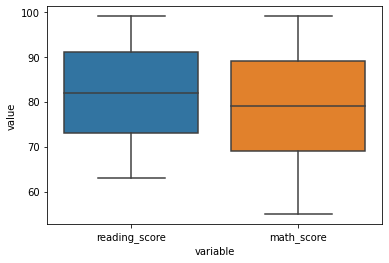

In [8]:
# Visualize scores to check for any outliers
box=school_perf[['reading_score','math_score']]
box=pd.melt(box)
sns.boxplot(x='variable',y='value',data=box)

In [9]:
# School- wise, grade- wise average marks

group1=school_perf.groupby(['school','grade'])['reading_score','math_score'].mean().reset_index()
group1

,school,grade,reading_score,math_score
0,Bailey High School,10th,80.907183,76.996772
1,Bailey High School,11th,80.945643,77.515588
2,Bailey High School,12th,80.912451,76.492218
3,Bailey High School,9th,81.303155,77.083676
4,Cabrera High School,10th,84.253219,83.154506
5,Cabrera High School,11th,83.788382,82.765560
6,Cabrera High School,12th,84.287958,83.277487
7,Cabrera High School,9th,83.676136,83.094697
8,Figueroa High School,10th,81.408912,76.539974
9,Figueroa High School,11th,80.640339,76.884344


# Report 1- District report

In [10]:
# Group student performance per school
group2=group1.groupby('school')['reading_score','math_score'].mean().reset_index()
group2
group2=group2.rename(columns={'reading_score':'avg_reading_score','math_score':'avg_math_score'}) #---rename columns
group2

,school,avg_reading_score,avg_math_score
0,Bailey High School,81.017108,77.022063
1,Cabrera High School,84.001424,83.073063
2,Figueroa High School,81.158178,76.744681
3,Ford High School,80.740336,77.032920
4,Griffin High School,83.844469,83.367836
5,Hernandez High School,80.945072,77.274625
6,Holden High School,83.879014,83.768162
7,Huang High School,81.131532,76.652057
8,Johnson High School,80.969434,77.058469
9,Pena High School,84.086593,83.861782


In [11]:
# rename school_data column to merge in next step
schools_data=schools_data.rename(columns={'name':'school'})
schools_data

,School ID,school,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500
5,5,Wilson High School,Charter,2283,1319574
6,6,Cabrera High School,Charter,1858,1081356
7,7,Bailey High School,District,4976,3124928
8,8,Holden High School,Charter,427,248087
9,9,Pena High School,Charter,962,585858


In [12]:
# Generate required report

district_data=pd.merge(group2,schools_data,on='school') # merge student data wiith district data
district_data
district_data['pass%_math']=100 #---append pass %, (obtained by checking count in above cells)
district_data['pass%_reading']=100
district_data['overall_pass%']=(district_data['pass%_math']+district_data['pass%_reading'])/2 #---calculate average
district_data=district_data[district_data['type']=='District'] #----select district schools
district_data['total_students_in_district']=sum(district_data['size']) #----calculate total number of students in district
district_data['total budget for district']=sum(district_data['budget']) #----calculate total budget
district_data['total_schools_in_district']=district_data['school'].count() #----add column total schools
district_data=district_data[['total_schools_in_district','total_students_in_district', #---rearrange columns
                             'total budget for district','School ID','school',
                             'avg_reading_score', 'avg_math_score','type',
                             'size', 'budget', 'pass%_math', 'pass%_reading', 'overall_pass%']]
district_data

,total_schools_in_district,total_students_in_district,total budget for district,School ID,school,avg_reading_score,avg_math_score,type,size,budget,pass%_math,pass%_reading,overall_pass%
0,7,26976,17347923,7,Bailey High School,81.017108,77.022063,District,4976,3124928,100,100,100.0
2,7,26976,17347923,1,Figueroa High School,81.158178,76.744681,District,2949,1884411,100,100,100.0
3,7,26976,17347923,13,Ford High School,80.740336,77.032920,District,2739,1763916,100,100,100.0
5,7,26976,17347923,3,Hernandez High School,80.945072,77.274625,District,4635,3022020,100,100,100.0
7,7,26976,17347923,0,Huang High School,81.131532,76.652057,District,2917,1910635,100,100,100.0
8,7,26976,17347923,12,Johnson High School,80.969434,77.058469,District,4761,3094650,100,100,100.0
10,7,26976,17347923,11,Rodriguez High School,80.716043,76.889710,District,3999,2547363,100,100,100.0


In [13]:
#---write report to a csv file as a table---
#district_data.to_csv(r'C:\Users\USER\Desktop\task2\task2\report1_district.csv')

# Report 2- School report

In [14]:
schools_data

,School ID,school,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500
5,5,Wilson High School,Charter,2283,1319574
6,6,Cabrera High School,Charter,1858,1081356
7,7,Bailey High School,District,4976,3124928
8,8,Holden High School,Charter,427,248087
9,9,Pena High School,Charter,962,585858


In [15]:
students_data

,Student ID,name,gender,grade,school,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84
...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90


In [16]:
# merge above 2 dataframes on school name
school_report=pd.merge(students_data,schools_data,on='school')
school_report

,Student ID,name,gender,grade,school,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [17]:
# select required columns for the report

school_data=school_report[['school','reading_score','math_score','grade','type','size','budget']]
school_data

,school,reading_score,math_score,grade,type,size,budget
0,Huang High School,66,79,9th,District,2917,1910635
1,Huang High School,94,61,12th,District,2917,1910635
2,Huang High School,90,60,12th,District,2917,1910635
3,Huang High School,67,58,12th,District,2917,1910635
4,Huang High School,97,84,9th,District,2917,1910635
...,...,...,...,...,...,...,...
39165,Thomas High School,99,90,12th,Charter,1635,1043130
39166,Thomas High School,95,70,10th,Charter,1635,1043130
39167,Thomas High School,73,84,9th,Charter,1635,1043130
39168,Thomas High School,99,90,10th,Charter,1635,1043130


In [18]:
# Check if any students have a fail score in either reading or math

school_data[(school_data['reading_score']<40) | (school_data['math_score']<40)]

,school,reading_score,math_score,grade,type,size,budget


Above filter returns 0 rows, implies there are no students who failed. Therefore pass % is 100 for all schools in reading and math

In [19]:
# school-wise, class-wise average marks and other details

group3=school_data.groupby(['school','grade']).aggregate({'reading_score':'mean','math_score':'mean',
                                                      'type':'max','size':'max','budget':'max'}).reset_index()
group3

,school,grade,reading_score,math_score,type,size,budget
0,Bailey High School,10th,80.907183,76.996772,District,4976,3124928
1,Bailey High School,11th,80.945643,77.515588,District,4976,3124928
2,Bailey High School,12th,80.912451,76.492218,District,4976,3124928
3,Bailey High School,9th,81.303155,77.083676,District,4976,3124928
4,Cabrera High School,10th,84.253219,83.154506,Charter,1858,1081356
5,Cabrera High School,11th,83.788382,82.765560,Charter,1858,1081356
6,Cabrera High School,12th,84.287958,83.277487,Charter,1858,1081356
7,Cabrera High School,9th,83.676136,83.094697,Charter,1858,1081356
8,Figueroa High School,10th,81.408912,76.539974,District,2949,1884411
9,Figueroa High School,11th,80.640339,76.884344,District,2949,1884411


In [20]:
# Generate required report
report2=group3.groupby('school').aggregate({'reading_score':'mean','math_score':'mean','type':'max',
                                           'size':'max','budget':'max'}).reset_index()
report2=report2.rename(columns={'reading_score':'avg_reading_score_for_school','math_score':'avg_math_score_for_school'}) #--rename columns
report2['pass%_math']=100 #---append pass percentage for math
report2['pass%_reading']=100 #---append reading pass percentage
report2['overall_pass%']=(report2['pass%_math']+report2['pass%_reading'])/2
report2['budget_per_student']=report2['budget']/report2['size'] #---calculate budget per student
report2=report2.sort_values(by=['avg_reading_score_for_school','avg_math_score_for_school'],ascending=False) #---sort by reading, math scores

In [21]:
report2

,school,avg_reading_score_for_school,avg_math_score_for_school,type,size,budget,pass%_math,pass%_reading,overall_pass%,budget_per_student
9,Pena High School,84.086593,83.861782,Charter,962,585858,100,100,100.0,609.0
13,Wilson High School,84.010878,83.260280,Charter,2283,1319574,100,100,100.0,578.0
1,Cabrera High School,84.001424,83.073063,Charter,1858,1081356,100,100,100.0,582.0
14,Wright High School,83.968896,83.689191,Charter,1800,1049400,100,100,100.0,583.0
6,Holden High School,83.879014,83.768162,Charter,427,248087,100,100,100.0,581.0
12,Thomas High School,83.849978,83.418436,Charter,1635,1043130,100,100,100.0,638.0
4,Griffin High School,83.844469,83.367836,Charter,1468,917500,100,100,100.0,625.0
11,Shelton High School,83.680016,83.375159,Charter,1761,1056600,100,100,100.0,600.0
2,Figueroa High School,81.158178,76.744681,District,2949,1884411,100,100,100.0,639.0
7,Huang High School,81.131532,76.652057,District,2917,1910635,100,100,100.0,655.0


In [22]:
# rearrange columns as required
report2[['school','type','size','budget','budget_per_student','avg_math_score_for_school','avg_reading_score_for_school',
        'pass%_math','pass%_reading','overall_pass%']]
report2

,school,avg_reading_score_for_school,avg_math_score_for_school,type,size,budget,pass%_math,pass%_reading,overall_pass%,budget_per_student
9,Pena High School,84.086593,83.861782,Charter,962,585858,100,100,100.0,609.0
13,Wilson High School,84.010878,83.260280,Charter,2283,1319574,100,100,100.0,578.0
1,Cabrera High School,84.001424,83.073063,Charter,1858,1081356,100,100,100.0,582.0
14,Wright High School,83.968896,83.689191,Charter,1800,1049400,100,100,100.0,583.0
6,Holden High School,83.879014,83.768162,Charter,427,248087,100,100,100.0,581.0
12,Thomas High School,83.849978,83.418436,Charter,1635,1043130,100,100,100.0,638.0
4,Griffin High School,83.844469,83.367836,Charter,1468,917500,100,100,100.0,625.0
11,Shelton High School,83.680016,83.375159,Charter,1761,1056600,100,100,100.0,600.0
2,Figueroa High School,81.158178,76.744681,District,2949,1884411,100,100,100.0,639.0
7,Huang High School,81.131532,76.652057,District,2917,1910635,100,100,100.0,655.0


In [23]:
# write to csv
#report2.to_csv(r'C:\Users\USER\Desktop\task2\task2\report2_schools_performance.csv')